In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import keras

training_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1944 files belonging to 15 classes.


In [3]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    'dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1944 files belonging to 15 classes.


## Building the Model (CNN Model)

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\Snigdha.annavarajula\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=15,activation='softmax'))

## Compiling and Training Phase

In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [17]:
cnn.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │          22,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,808,239 (29.79 MB)

 Trainable params: 7,808,239 (29.79 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = cnn.fit(
    training_ds,
    validation_data=validation_ds,
    epochs=100
)

Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.0977 - loss: 2.9102 - val_accuracy: 0.2197 - val_loss: 2.5328
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.2021 - loss: 2.5024 - val_accuracy: 0.3297 - val_loss: 2.1721
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.3140 - loss: 2.2009 - val_accuracy: 0.4007 - val_loss: 2.0008
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.3724 - loss: 1.9869 - val_accuracy: 0.5211 - val_loss: 1.6559
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4550 - loss: 1.8029 - val_accuracy: 0.5957 - val_loss: 1.5238
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5337 - loss: 1.5799 - val_accuracy: 0.6466 - val_loss: 1.3103
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5955 - loss: 1.4356 - val_accuracy: 0.7428 - val_loss: 1.0543
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6563 - loss: 1.2236 - val_accuracy: 0.8030 - v

## Evaluating Model

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_ds)
print('Training accuracy:', train_acc)

61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.9883 - loss: 0.0506
Training accuracy: 0.9922839403152466


In [21]:
val_loss, val_acc = cnn.evaluate(validation_ds)
print('Validation accuracy:', val_acc)

61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.9945 - loss: 0.0313
Validation accuracy: 0.9922839403152466


## Saving Model

In [22]:
cnn.save('trained_animal_classifier_model.keras')

In [23]:
history.history

{'accuracy': [0.1111111119389534,
  0.22427983582019806,
  0.3328189253807068,
  0.40740740299224854,
  0.47325101494789124,
  0.5308641791343689,
  0.6116254925727844,
  0.6661522388458252,
  0.7129629850387573,
  0.7875514626502991,
  0.8225308656692505,
  0.8353909254074097,
  0.8580247163772583,
  0.8960905075073242,
  0.8945473432540894,
  0.9125514626502991,
  0.9583333134651184,
  0.9495884776115417,
  0.9156378507614136,
  0.9506173133850098,
  0.951646089553833,
  0.9506173133850098,
  0.9593621492385864,
  0.9480452537536621,
  0.9773662686347961,
  0.9943415522575378,
  0.9763374328613281,
  0.9614197611808777,
  0.9650205969810486,
  0.9902263283729553,
  0.9850823283195496,
  0.970678985118866,
  0.9742798209190369,
  0.9912551641464233,
  0.9830247163772583,
  0.9681069850921631,
  0.9814814925193787,
  0.959876537322998,
  0.9696502089500427,
  0.9819958806037903,
  0.9876543283462524,
  0.9938271641731262,
  0.9830247163772583,
  0.9927983283996582,
  0.9881687164306641

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [25]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy and Loss Visualization

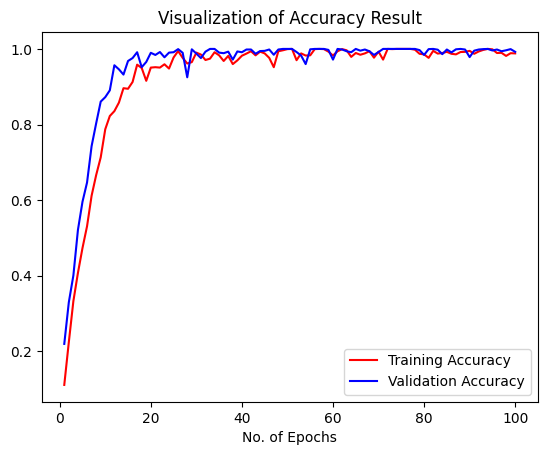

In [28]:
epochs = [i for i in range(1,101)]
plt.plot(epochs, history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

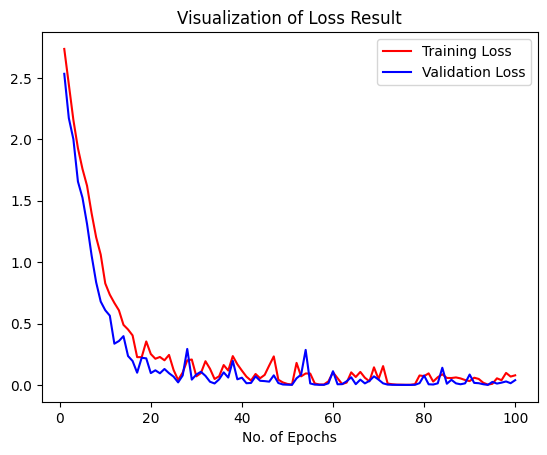

In [29]:
epochs = [i for i in range(1,101)]
plt.plot(epochs, history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs, history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [30]:
class_name = validation_ds.class_names

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    directory='dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1944 files belonging to 15 classes.


In [32]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1944/1944 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step


In [33]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [34]:
Y_true

<tf.Tensor: shape=(1944,), dtype=int64, numpy=array([ 0,  0,  0, ..., 14, 14, 14])>

In [35]:
predicted_categories

<tf.Tensor: shape=(1944,), dtype=int64, numpy=array([ 0,  0,  0, ..., 14, 14, 14])>

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [37]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

        Bear       1.00      1.00      1.00       125
        Bird       1.00      1.00      1.00       137
         Cat       1.00      1.00      1.00       123
         Cow       1.00      0.98      0.99       131
        Deer       0.98      0.98      0.98       127
         Dog       1.00      1.00      1.00       122
     Dolphin       1.00      1.00      1.00       129
    Elephant       1.00      0.99      1.00       133
     Giraffe       1.00      0.97      0.98       129
       Horse       1.00      1.00      1.00       130
    Kangaroo       0.97      1.00      0.98       126
        Lion       0.99      1.00      1.00       131
       Panda       1.00      1.00      1.00       135
       Tiger       1.00      0.95      0.98       129
       Zebra       0.95      1.00      0.98       137

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99   

## Confusion Matrix Visualization

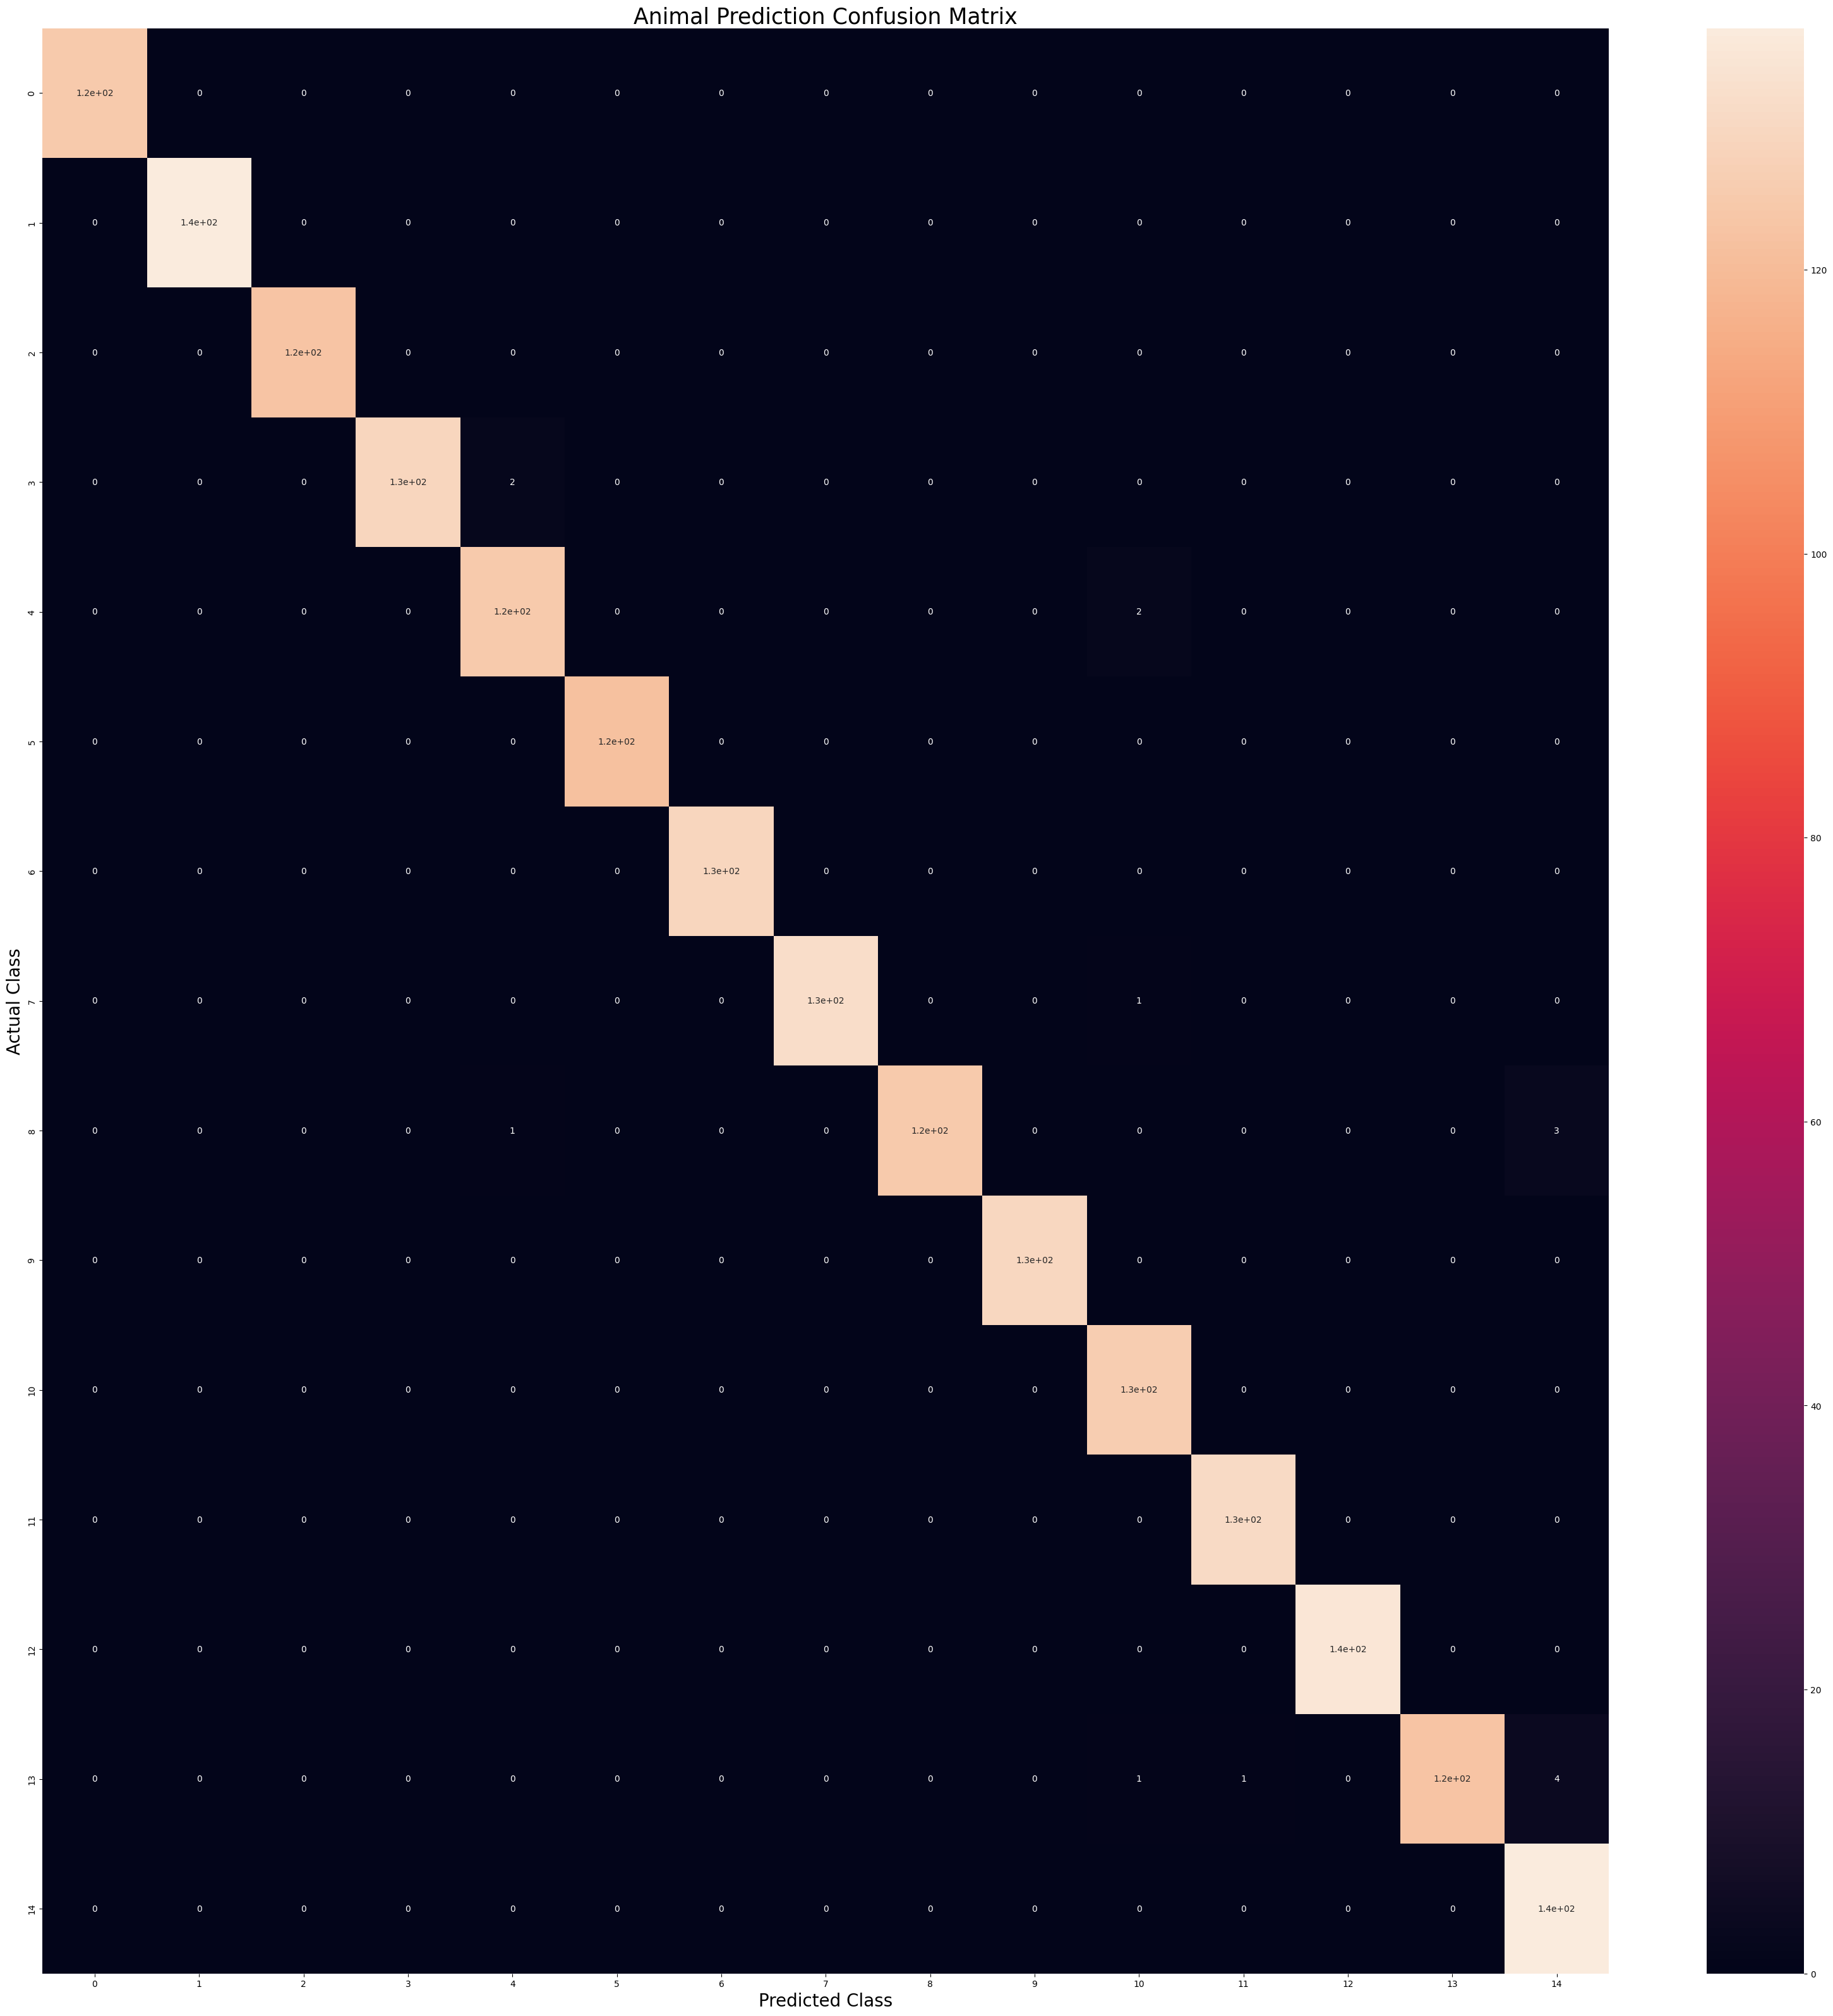

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Animal Prediction Confusion Matrix',fontsize = 25)
plt.show()